# Lab 5 | EDA & Visualisation

In [43]:
import pandas as pd
df = pd.read_csv("../data/students.csv")
df

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior
...,...,...,...,...,...,...
95,96,15,2.37,M,Art,sophomore
96,97,15,2.10,M,Art,sophomore
97,98,17,2.80,F,Computer Science,senior
98,99,17,2.75,F,COMPUTER SCIEN,senior


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [4]:
df.isna().sum()

student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

#### Which column has the most missing values and why might that be?
gpa, freshmen don't have their gpa yet

In [27]:
data = []
header = ["Data","Count", "Mean", "Median", "Variance", "Standard Deviation", "Min", "Max"]

for col in ["age", "gpa"]:
    row = [col, df[col].count(), df[col].mean(), df[col].median(), df[col].var(), df[col].std(), df[col].min(), df[col].max()]
    data.append(row)

summary = pd.DataFrame(data, columns =header)

summary

,Data,Count,Mean,Median,Variance,Standard Deviation,Min,Max
0,age,100,16.130000,16.000,1.892020,1.375507,14.00,18.00
1,gpa,90,2.624667,2.665,0.227432,0.476898,1.63,3.93


<Axes: >

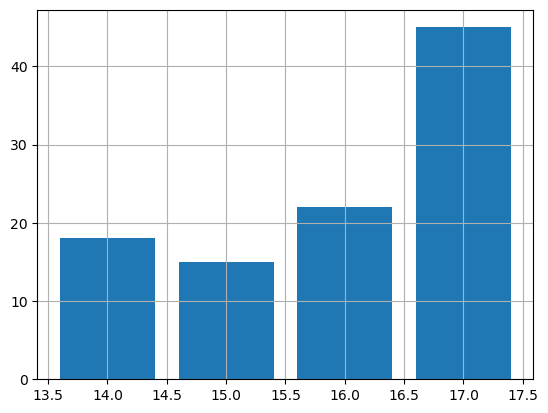

In [11]:
df["age"].hist(bins=range(14, 19), align="left", rwidth=0.8)

<Axes: xlabel='gpa', ylabel='Count'>

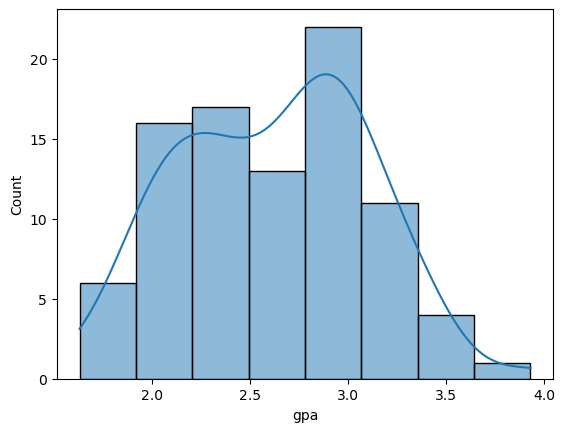

In [12]:
import seaborn as sns
sns.histplot(df["gpa"], kde=True)

the pandas histogram is very personalizable while the seaborn histogram is simpler to look at with a curve

0.8786075344584666

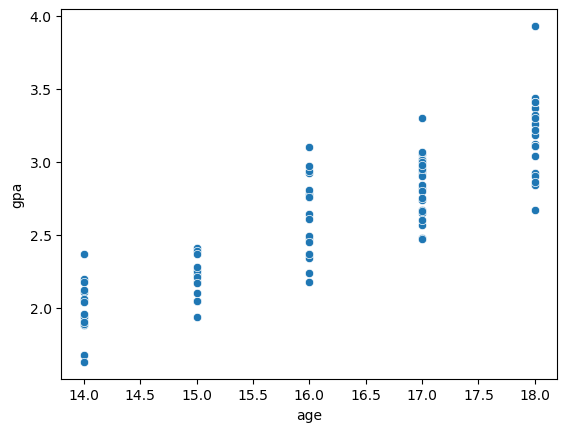

In [15]:
sns.scatterplot(x="age", y="gpa", data=df)

p_correlation = df["age"].corr(df["gpa"])
p_correlation

gpa increases as age increases

In [42]:
import numpy as np
df["major"] = df["major"].str.lower().str.strip().replace("", None)
df_cleaned = df.dropna(subset=['major'])
df_cleaned

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,economics,freshman
1,2,17,2.92,M,history,senior
2,3,17,2.97,F,physics,senior
3,4,16,2.76,F,physics,junior
4,5,16,2.24,M,chemistry,junior
...,...,...,...,...,...,...
95,96,15,2.37,M,art,sophomore
96,97,15,2.10,M,art,sophomore
97,98,17,2.80,F,computer science,senior
98,99,17,2.75,F,computer scien,senior


In [44]:
df.to_csv('../data/students_cleaned.csv', index=False)